In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def posterior_grid_approx(grid_points, success, tosses, truncate=False):
    # define grid (grid_points number of values evenly spaced between 0 and 1)
    p_grid = np.linspace(0, 1, grid_points)

    # define prior (grid_points number of values all equal to 5)
    if truncate:
        prior = (p_grid >= 0.5).astype(int)  # truncated
    else:
        prior = np.repeat(5, grid_points)  # uniform

    # compute probability of data at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unorm_posterior = likelihood * prior

    # normalize the posterior, so it sums to 1
    posterior = unorm_posterior / unorm_posterior.sum()

    # provides the grid of points and the posterior value for each one
    return p_grid, posterior

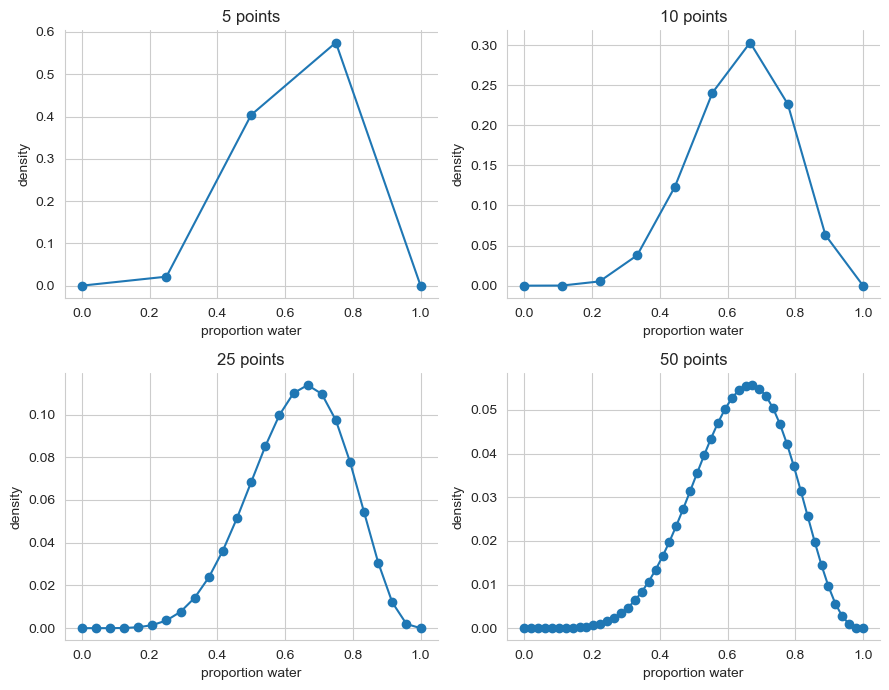

In [3]:
W, L = 6, 3
_, ax = plt.subplots(2, 2, figsize=(9, 7))
for i, size in enumerate([5, 10, 25, 50]):
    ax[i // 2][i % 2].plot(*posterior_grid_approx(size, W, W + L), marker='o')
    ax[i // 2][i % 2].set_xlabel("proportion water")
    ax[i // 2][i % 2].set_ylabel("density")
    ax[i // 2][i % 2].set_title(f"{size} points")


sns.despine()
plt.tight_layout()
plt.show()

p_grid, post = posterior_grid_approx(grid_points=1000
                                     , success=W, tosses=W+L)
p_samples = np.random.choice(p_grid, p=post, size=int(1e4), replace=True)
posterior_pred = stats.binom.rvs(n=9, p=p_samples)

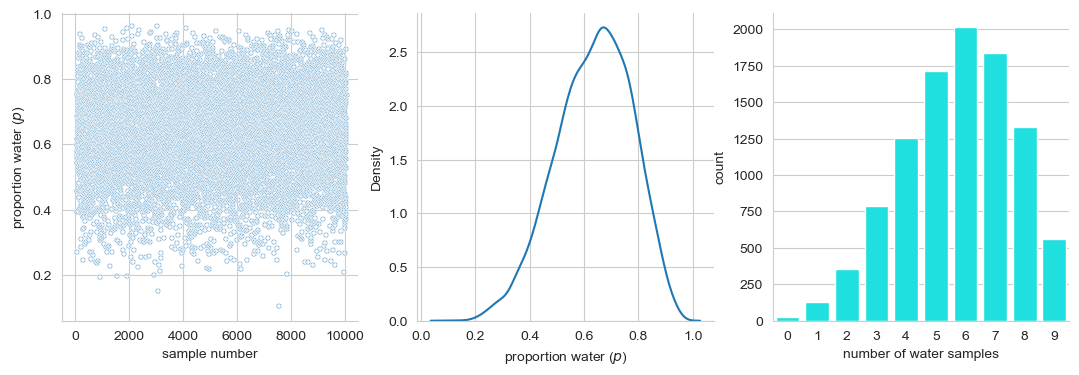

In [4]:
pd.Series.value_counts(posterior_pred).sort_index()

fig, axs = plt.subplots(ncols=3, figsize=(13, 4))
sns.scatterplot(x=range(len(p_samples)), y=p_samples, marker="$\circ$", ax=axs[0])
axs[0].set_xlabel("sample number")
axs[0].set_ylabel("proportion water ($p$)")

sns.kdeplot(p_samples, ax=axs[1])
axs[1].set_xlabel("proportion water ($p$)")

sns.barplot(x=np.arange(10), y=pd.Series.value_counts(posterior_pred).sort_index(), ax=axs[2], color="cyan")
axs[2].set_xlabel("number of water samples")
sns.despine()